# TopSBM: Topic Modeling with Stochastic Block Models

A basic tutorial.


In [4]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup: Load a corpus

1) We have a list of documents, each document contains a list of words.

2) We have a list of document titles (optional) 

The example corpus consists of 63 articles from Wikipedia taken from 3 different categories (Experimental Physics, Chemical Physics, and Computational Biology).



In [5]:
path_data = ''

## texts
fname_data = 'corpus.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r', encoding = 'utf8') as f:
    x = f.readlines()
texts = [h.split() for h in x]

## titles
fname_data = 'titles.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r', encoding = 'utf8') as f:
    x = f.readlines()
titles = [h.split()[0] for h in x]

In [6]:
i_doc = 0
print(titles[0])
print(texts[i_doc][:10])


Nuclear_Overhauser_effect
['the', 'nuclear', 'overhauser', 'effect', 'noe', 'is', 'the', 'transfer', 'of', 'nuclear']


# Fitting the model

In [7]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
model.make_graph(texts,documents=titles)

## we can also skip the previous step by saving/loading a graph
# model.save_graph(filename = 'graph.xml.gz')
# model.load_graph(filename = 'graph.xml.gz')

## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit()

<NestedBlockState object, with base <BlockState object with 3203 blocks (84 nonempty), degree-corrected, for graph <Graph object, undirected, with 3203 vertices and 13050 edges, 2 internal vertex properties, 1 internal edge property, at 0x7efd8c379e80>, at 0x7efd53b82640>, and 5 levels of sizes [(3203, 84), (84, 22), (22, 6), (6, 2), (2, 1)] at 0x7efd53b82790>


# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

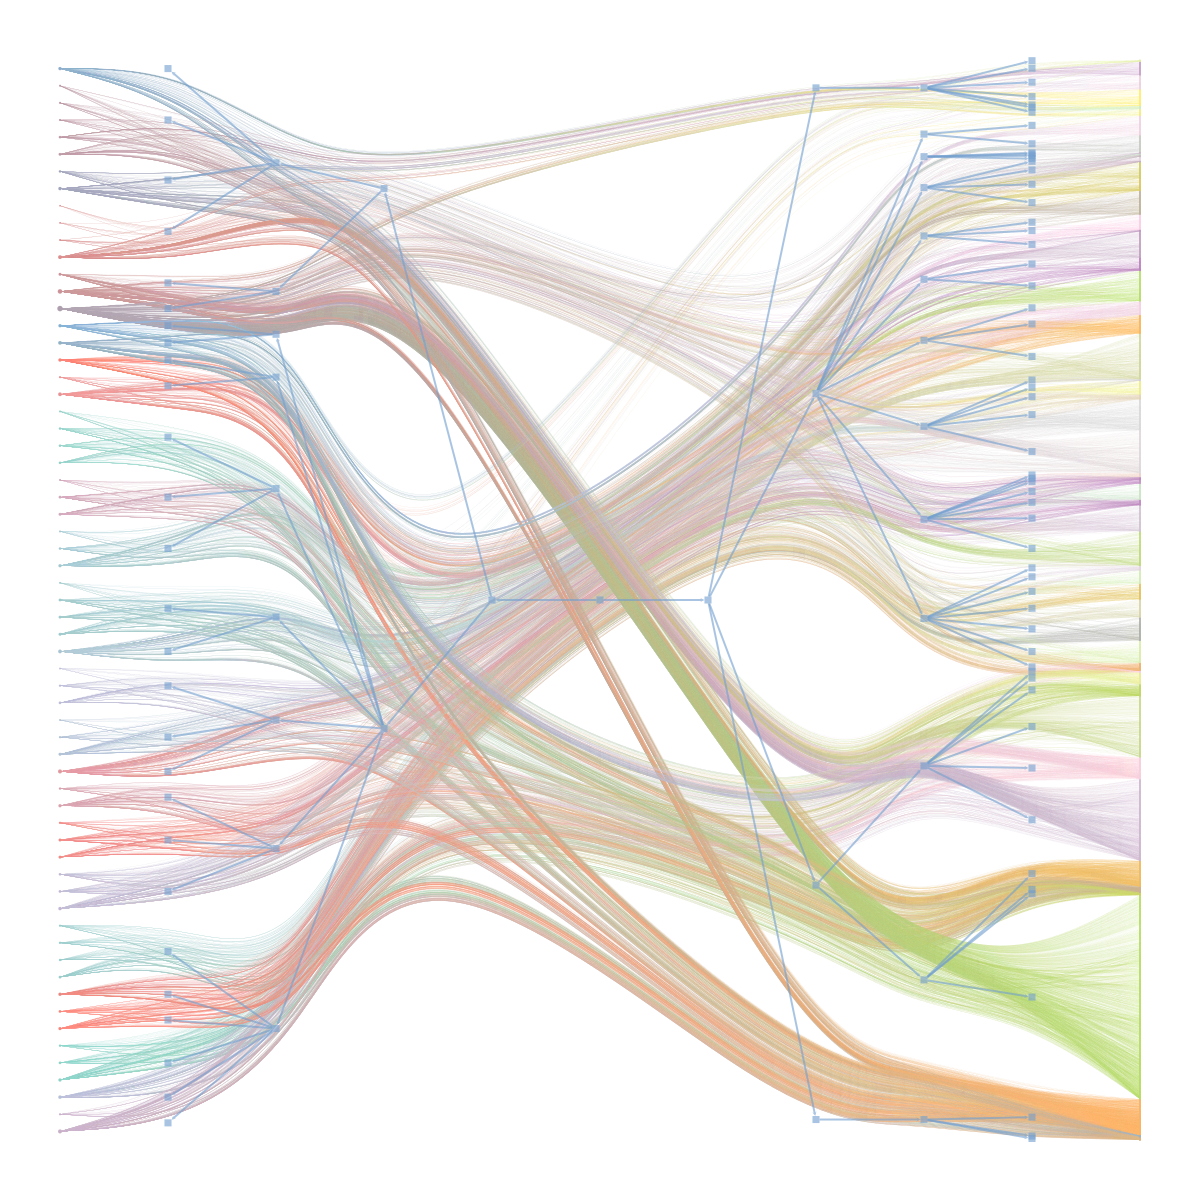

In [8]:
model.plot(nedges=10000)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [9]:
model.topics(l=1,n=20)

{0: [('the', 0.23024895668441503),
  ('of', 0.12994675492876673),
  ('a', 0.07540653331414592),
  ('to', 0.07310404374730177),
  ('in', 0.07044179018563822),
  ('as', 0.028709166786587997),
  ('that', 0.02324075406533314),
  ('by', 0.02057850050366959),
  ('with', 0.017628435746150525),
  ('an', 0.017412577349258888),
  ('this', 0.01604547416894517),
  ('can', 0.014894229385523096),
  ('or', 0.01388689020002878),
  ('from', 0.013814937401064901),
  ('it', 0.013527126205209383),
  ('at', 0.011512447834220752),
  ('not', 0.008562383076701683),
  ('has', 0.008418477478773924),
  ('such', 0.0076989494891351274),
  ('these', 0.007483091092243488)],
 1: [('electron', 0.02750225428313796),
  ('x', 0.023444544634806132),
  ('molecule', 0.02254283137962128),
  ('spin', 0.021190261496844005),
  ('surface', 0.020739404869251576),
  ('atoms', 0.020739404869251576),
  ('magnetic', 0.01848512173128945),
  ('frequency', 0.017132551848512173),
  ('because', 0.016681695220919748),
  ('electrons', 0.015

## Topic-distribution in each document
Which topics contribute to each document?

In [10]:
## select a document (by its index)
i_doc = 0
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
model.topicdist(i_doc,l=1)

Nuclear_Overhauser_effect


[(0, 0.36713286713286714),
 (1, 0.2692307692307692),
 (2, 0.038461538461538464),
 (3, 0.14685314685314685),
 (4, 0.04195804195804196),
 (5, 0.08041958041958042),
 (6, 0.0034965034965034965),
 (7, 0.013986013986013986),
 (8, 0.013986013986013986),
 (9, 0.006993006993006993),
 (10, 0.0034965034965034965),
 (11, 0.0034965034965034965),
 (12, 0.01048951048951049)]

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [17]:
model.clusters(l=1,n=5)

{0: [('Nuclear_Overhauser_effect', 1.0),
  ('Molecular_vibration', 1.0),
  ('Particle-induced_X-ray_emission', 1.0),
  ('X-ray_crystal_truncation_rod', 1.0),
  ('X-ray_standing_waves', 1.0)],
 1: [('Electrostatic_deflection_(structural_element)', 1.0),
  ('Molecular_beam', 1.0),
  ('Experimental_physics', 1.0),
  ('Pauli_effect', 1.0),
  ('Einstein–de_Haas_effect', 1.0)],
 2: [('Polarizability', 1.0),
  ('Effective_field_theory', 1.0),
  ('RRKM_theory', 1.0),
  ('Rotating_wave_approximation', 1.0),
  ('Quantum_oscillations_(experimental_technique)', 1.0)],
 3: [('Empirical_formula', 1.0),
  ('Ziff-Gulari-Barshad_model', 1.0),
  ('Fuel_mass_fraction', 1.0),
  ("Euler's_laws_of_motion", 1.0),
  ("Newton's_laws_of_motion", 1.0)],
 4: [('Wave_tank', 1.0),
  ('Reactive_empirical_bond_order', 1.0),
  ('Ripple_tank', 1.0),
  ('Faraday_cup_electrometer', 1.0),
  ('Line_source', 1.0)],
 5: [('Philosophical_interpretation_of_classical_physics', 1.0),
  ('Uncertainty', 1.0),
  ('Law_of_Maximum', 

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [12]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=1,)

2 Rovibrational_coupling


[(0, 'Nuclear_Overhauser_effect'),
 (5, 'Rotational_transition'),
 (6, 'Dynamic_nuclear_polarisation'),
 (7, 'Knight_shift'),
 (12, 'Molecular_vibration'),
 (15, 'Magic_angle_(EELS)'),
 (17, 'Photofragment-ion_imaging'),
 (27, 'Particle-induced_X-ray_emission'),
 (29, 'Complementary_experiments'),
 (33, 'X-ray_crystal_truncation_rod'),
 (36, 'X-ray_standing_waves'),
 (40, 'Fragment_separator')]

# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

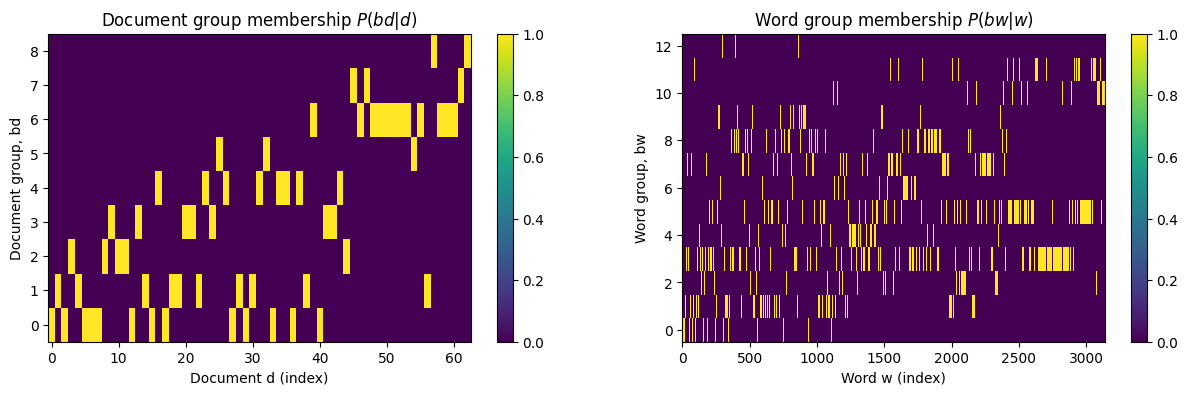

In [13]:
p_td_d,p_tw_w = model.group_membership(l=1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()